## 사이킷런으로 Linear Regression 모델을 사용해보자

In [1]:
# 패키지를 import
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
# x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# 1차원 데이터
# arange = array(10)
x = np.arange(10)
print(x)
print(x.shape)

[0 1 2 3 4 5 6 7 8 9]
(10,)


In [5]:
# x.shape(10,1)
# 2차원 데이터
# (np.arange(10)) -> reshape(-1,1)
x = np.arange(10).reshape(-1,1)

In [6]:
x = np.arange(12)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [7]:
x = x.reshape(3,4) # x를 3행 4열로 만듦
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [8]:
x.reshape(2,-1) # 행을 고정하고, 열을 데이터 갯수에 맞게끔 설정한다. 

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [13]:
# 직선의 방정식을 만들기 위해, 
# y = 2x + 1에 대한 데이터셋을 넣어주고
# y = wx + b에서 w = 2이고, b = 1임을 찾아낸다. 
x = np.arange(10).reshape(-1,1)
y = (2*x + 1).reshape(-1,1)
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]]


In [17]:
# 선형 모델 선언(정의)
model = LinearRegression() 

# 학습(Training)
# model.fit(문제, 답)
model.fit(x,y)

LinearRegression()

In [19]:
# 예측
# 학습이 끝나게 되면 이전에 학습되지 않은 x데이터를 
# 입력해서 예측이 잘되는지 확인한다. 
prediction = model.predict([[10.0]]) # x데이터에 10.0을 넣음
prediction

array([[21.]])

## 데이터 분할하는 메소드를 사용

### train_test_split() 메소드를 활용

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

In [21]:
X = [[0,1], [2,3], [4,5], [6,7], [8,9]]
Y = [0, 1, 2, 3, 4]

# X의 전체 데이터 5개 중에 20%를 test로 주고싶다.
# train:test = 8:2 = 4:1
# random_state는 random seed값을 의미. (한번 고정하면, 다시 돌려도 같은 값이 나옴)
X_train, X_test = train_test_split(X, test_size=0.2, random_state = 123)

In [22]:
print(X_train)
print(X_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[[2, 3]]


In [24]:
# 데이터(X)와 레이블(Y)를 함께 train_test_split에 넣은 경우
X_train, X_test, Y_train, Y_test,  = train_test_split(X,Y, test_size=0.2, random_state = 123)

In [26]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[3, 4, 0, 2]
[[2, 3]]
[1]


## 예제: 당뇨병 1년후 병의 진전도 예측

### scikit-learn 데이터셋 중에 load_diabetes() 메소드

In [28]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [29]:
print(diabetes.DESCR) #description 나옴

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [31]:
features = diabetes.feature_names
print('feature names: ', features)

feature names:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [33]:
print(diabetes.data.shape) # data는 x
print(diabetes.target.shape) #target은 y(레이블이 달린 정답)

(442, 10)
(442,)


In [34]:
X = diabetes.data
Y = diabetes.target

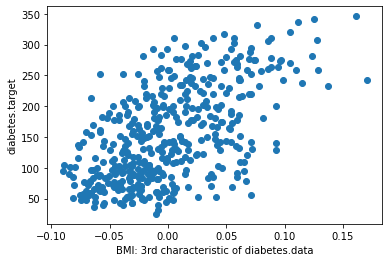

In [36]:
import matplotlib.pyplot as plt

# X[2]: BMI지수, Y: target의 관계 그래프를 그려본다. 
plt.scatter(X[:,2],Y) # X[:, 2]X에서 모든 행을 가져오는데, 2번째 데이터인 bmi만
plt.xlabel('BMI: 3rd characteristic of diabetes.data')
plt.ylabel('diabetes.target')
plt.show()

In [39]:
bmi = X[:, np.newaxis, 2] 
print(bmi.shape) # 실행결과: (442,1): 442행 1열
print(bmi[:5]) # 0~4행까지 데이터만 확인

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [40]:
# 442개의 데이터를 train데이터와 test데이터로 나누자
from sklearn.model_selection import train_test_split

# 442개를 8:2로 나눈다.
bmi_train, bmi_test, y_train, y_test = train_test_split(bmi, Y, test_size = 0.2, random_state=123)

In [41]:
# 제대로 나눠졌는지 찍어보기(8:2로 나눠져있어야함)
print(bmi_train.shape)
print(y_train.shape)
print(bmi_test.shape)
print(y_test.shape)

(353, 1)
(353,)
(89, 1)
(89,)


In [42]:
from sklearn.linear_model import LinearRegression

# model을 선언(정의)
model = LinearRegression()

In [43]:
# 모델을 학습(training)
model.fit(bmi_train, y_train) # x값과 y값 넣어주기

LinearRegression()

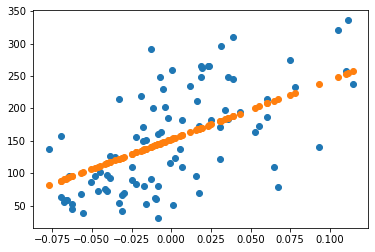

In [44]:
# 학습된 모델을 테스트 (확인)
y_pred = model.predict(bmi_test)
plt.scatter(bmi_test, y_test) 
plt.scatter(bmi_test, y_pred)
plt.show()